# **Airbnb Project: Exploratory Data Analysis of Properties in Denmark**
**Scope:** The project's objective is to explore and analyze Airbnb data related to properties in Denmark. Furthermore, it aims to investigate the various aspects that differentiate properties in Sealand from the rest of Denmark. Finally, the project involves building a machine learning model to predict house prices.

**Data Source:** The data pertains to properties listed on Airbnb in Denmark during the period 2016-2019, provided by Deakin University for educational purposes.  

**General Process:** 
- Phase 1. Data Cleaning and Exploring
    + Handling missing values, duplicated values
    + Specify properties in Sealand
    + Data distribution
    + Data correlation   
- Phase 2. Data Analysis: Properties in Sealand compared to the rest of Denmark  
    + Price comparision: overall price, average price over time, price estimation with Linear Regression Analysis
    + Customer Satisfaction comparison with Hypothesis Testing
    + Most prominent hosts in Sealand
- Phase 3. Prediction Model: Properties price classification
    + Labeling
    + Handling outliers with IQR
    + Examining Data Balance and Multicollinearity with VIF 
    + Normalization
    + Modelling: Logistic Regresison, KNN, Decision Tree
    + Model evaluation    
    
**Author: Anh Vi Pham - Henry**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/anhvi02/EDA_AirBnb/main/AirBNB-Denmark-A1-2023.csv', encoding='latin-1')
df.head(5)

,prop_room_id,host_id,prop_room_type,neighborhood,reviews,overall_satisfaction,accommodates,price_USD,minstay,description,latitude,longitude,first_listed
0,7193709,37672850,Private room,Tårnby,354,5.0,1.0,41.0,1,Charming house near the airport,55.616651,12.631454,30/11/2016
1,4446663,22317683,Private room,København,285,4.5,2.0,70.0,1,værelse til leje,55.670082,12.556838,25/12/2016
2,1453654,7080722,Private room,Tårnby,319,5.0,2.0,64.0,1,"Comfortable room, close to airport",55.633597,12.618074,3/01/2017
3,30557,131674,Private room,København,345,5.0,2.0,90.0,1,Great Place in Center of Copenhagen,55.681167,12.565207,4/01/2017
4,443684,2204282,Entire home/apt,København,265,4.5,10.0,242.0,1,"Penthouse, 4-5 rooms + 5 balconies",55.703808,12.548259,9/01/2017


# **Phase 1. Data Cleaning and Exploring**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23941 entries, 0 to 23940
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prop_room_id          23941 non-null  int64  
 1   host_id               23941 non-null  int64  
 2   prop_room_type        23941 non-null  object 
 3   neighborhood          23941 non-null  object 
 4   reviews               23941 non-null  int64  
 5   overall_satisfaction  23941 non-null  float64
 6   accommodates          23939 non-null  float64
 7   price_USD             23939 non-null  float64
 8   minstay               23941 non-null  int64  
 9   description           23855 non-null  object 
 10  latitude              23941 non-null  float64
 11  longitude             23940 non-null  float64
 12  first_listed          23941 non-null  object 
dtypes: float64(5), int64(4), object(4)
memory usage: 2.4+ MB


In [43]:
df.isnull().sum()

prop_room_id             0
host_id                  0
prop_room_type           0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             2
price_USD                2
minstay                  0
description             86
latitude                 0
longitude                1
first_listed             0
dtype: int64

In [44]:
df = df.dropna(subset=['accommodates', 'price_USD','longitude'])
df.isnull().sum()

prop_room_id             0
host_id                  0
prop_room_type           0
neighborhood             0
reviews                  0
overall_satisfaction     0
accommodates             0
price_USD                0
minstay                  0
description             85
latitude                 0
longitude                0
first_listed             0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
df.describe()

,prop_room_id,host_id,reviews,overall_satisfaction,accommodates,price_USD,minstay,latitude,longitude
count,2.393600e+04,2.393600e+04,23936.000000,23936.000000,23936.000000,23936.000000,23936.000000,23936.000000,23936.000000
mean,1.105201e+07,4.197182e+07,9.510988,2.505139,4.043658,110.744485,1.006852,55.831366,11.565701
std,5.487977e+06,3.532349e+07,19.272641,2.378072,2.268092,114.262813,0.195935,0.484171,1.377947
min,2.493600e+04,3.471000e+04,0.000000,0.000000,1.000000,1.000000,1.000000,54.572779,8.087828
25%,6.562074e+06,1.272914e+07,0.000000,0.000000,2.000000,61.000000,1.000000,55.660702,10.209131
50%,1.239131e+07,3.279631e+07,3.000000,4.000000,4.000000,89.000000,1.000000,55.693640,12.460746
75%,1.579362e+07,6.480749e+07,10.000000,5.000000,6.000000,132.000000,1.000000,56.075316,12.557020
max,1.886479e+07,1.314207e+08,386.000000,5.000000,16.000000,7909.000000,20.000000,57.735625,15.153187


In [47]:
# locate Sealand with latitude and longitude
df['location'] = 'Non-Sealand'
df.loc[(df['latitude']<=55.78) & (df['longitude']>=10.994) & (df['longitude']<=12.672), 'location'] = 'Sealand' 
df['location'].value_counts()

Sealand        12630
Non-Sealand    11306
Name: location, dtype: int64

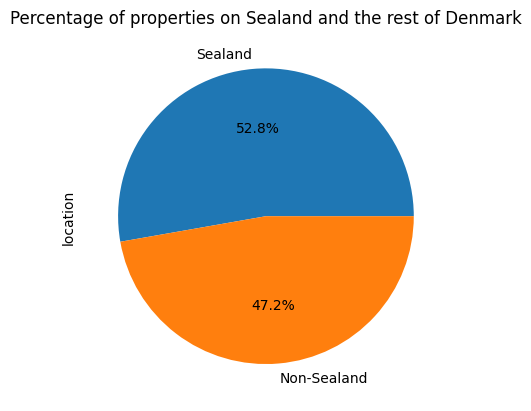

In [48]:
df['location'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of properties on Sealand and the rest of Denmark')
plt.show()

Data distribution

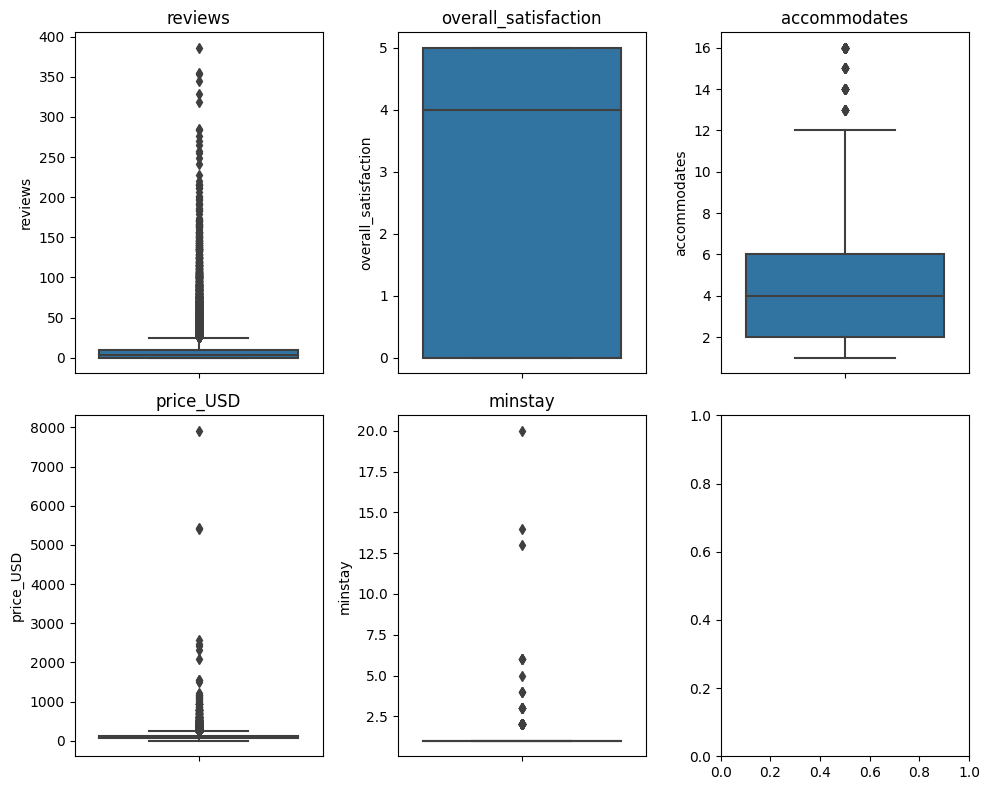

In [49]:
columns = ['reviews','overall_satisfaction', 'accommodates', 'price_USD', 'minstay']
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.ravel()
for ind, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axs[ind])
    axs[ind].set_title(col)
plt.tight_layout()
plt.show()

Correlation matrix

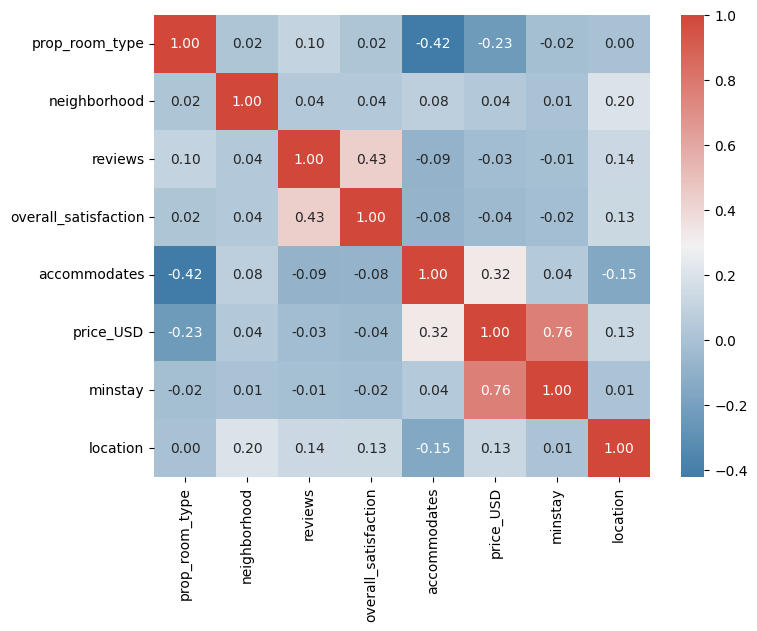

In [15]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
cols = ['prop_room_type','neighborhood','location']

df_corre = df.copy()
for col in cols:
    df_corre[col] = enc.fit_transform(df_corre[col])
# pearson correlation
corr = df_corre.drop(columns={'prop_room_id','host_id', 'latitude', 'longitude'}).corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 15, as_cmap=True)

# plotting
plt.figure(figsize=(8,6))
sns.heatmap(data=corr,annot=True, cmap=cmap,fmt=".2f")
plt.show()

In [51]:
df_corre.drop(columns={'prop_room_id','host_id', 'latitude', 'longitude','description','first_listed'}).columns

Index(['prop_room_type', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'price_USD', 'minstay', 'description', 'first_listed',
       'location'],
      dtype='object')

# **Phase 2. Data Analysis: Properties in Sealand compared to the rest of Denmark**

*As Sealand incorporates the capital city of Copenhagen (Danish: København), AirBNB wants to know if there are differences between the Sealand properties versus those in the rest of Denmark. Explore this from the perspective of people staying at the rentals (define)*

### **1. Price comparison for properties in Sealand compared to the rest of Denmark**

##### **a. Overall price**

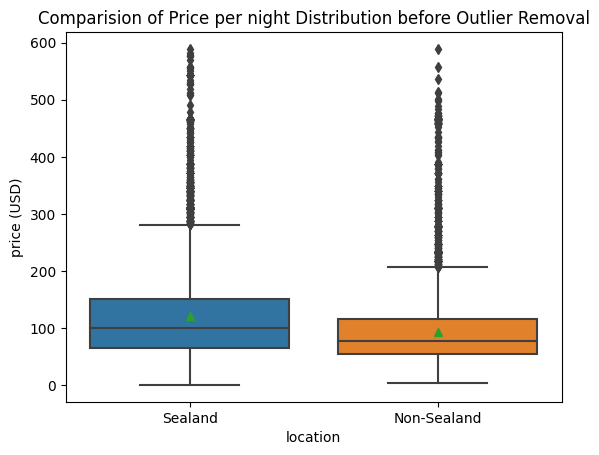

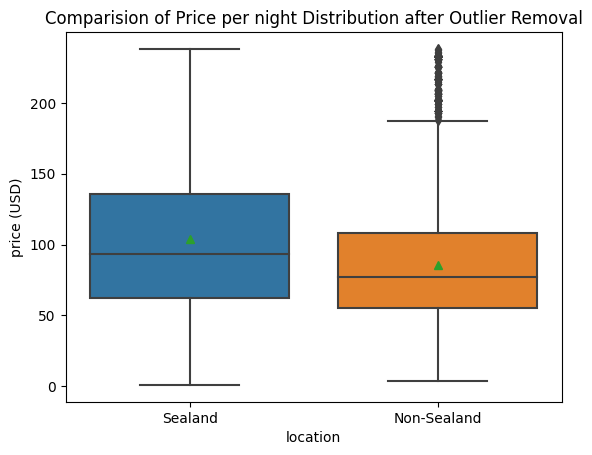

In [16]:
# calculate price per person
df['price_per_night'] = df['price_USD']/df['minstay']

# Before outlier removal
ax = sns.boxplot(data=df, y='price_per_night',x='location',showmeans=True)
ax.set_title('Comparision of Price per night Distribution before Outlier Removal')
ax.set_ylabel('price (USD)')
plt.show()

# After outlier removal
def iqr_outliers(series):
    Q1, Q3= np.percentile(series,[25,75])
    IQR = Q3 - Q1 
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    series_outlier_removed = series[(series > lower_fence) & (series < upper_fence)]
    return series_outlier_removed

df_rm = df.loc[:,['price_per_night','location']].copy()
df_rm['price_per_night'] = iqr_outliers(df_rm['price_per_night'])

ax = sns.boxplot(data=df_rm, y='price_per_night',x='location',showmeans=True)
ax.set_title('Comparision of Price per night Distribution after Outlier Removal')
ax.set_ylabel('price (USD)')
plt.show()


With the plot, some observations can be given as follow:
- Based on the median, we can see that the overall price of property on Sealand is slightly higher than the rest of Denmark.
- However, the range (IQR) of the price of property on Sealand is broader, indicating an inconsistency on the contrary with Non-Sealand.
- Noticeably, there are multiple outliers for the price per night of properties on the rest of Denmark.  


##### **b. Average price over time**

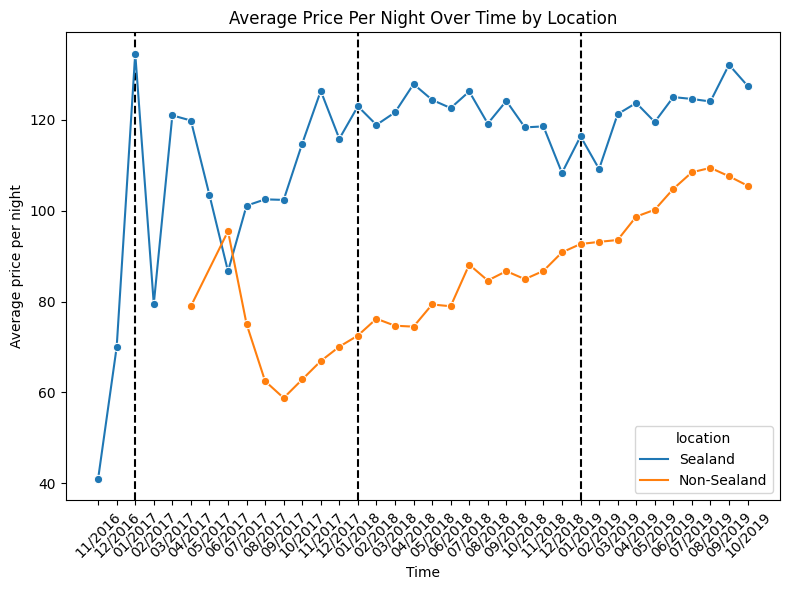

In [17]:
# extract data for time analysis
df_time = df[['first_listed','price_per_night','location']].copy()

# convert data type from object to datetime
df_time['first_listed'] = pd.to_datetime(df_time['first_listed'], format='%d/%m/%Y')
df_time['month_year'] = df_time['first_listed'].dt.strftime('%m/%Y')

# group data to aggregate
gr_time = df_time.groupby(['month_year','location'])['price_per_night'].mean().reset_index().sort_values(by='month_year')

# extract month and year to sort
gr_time[['month', 'year']] = gr_time['month_year'].str.split('/', expand=True)
# convert data type to sort
gr_time['month'] = gr_time['month'].astype(int)
gr_time['year'] = gr_time['year'].astype(int)
# sort values by year and month
gr_time = gr_time.sort_values(by=['year', 'month'])

# display plot
plt.figure(figsize=(8, 6))

vertical_lines = [2,14,26]  # vị trí các ticks để vẽ các đường thẳng (theo thứ tự)
for line in vertical_lines:
    plt.axvline(x=line, color='black', linestyle='--')

sns.lineplot(data=gr_time, x='month_year', y='price_per_night', marker='o', hue='location')
plt.xlabel('Time')
plt.ylabel('Average price per night')
plt.title('Average Price Per Night Over Time by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot, we can observe that, on average, the price of properties located in Sealand was higher compared to that of Non-Sealand for most of the given period, except for a brief period in May 2017.  

Furthermore:

- The overall trend of the average property prices in both areas was consistently upward.
- The data indicates a slightly seasonal nature for Sealand's average property prices, occurring annually. Prices experienced a significant drop in January each year before undergoing a considerable rise immediately afterward. The average price then exhibited an unstable upward trend before experiencing a slight drop in October each year.

##### **c. Price estimation with Linear Regression Analysis**

In [18]:
# copy the original dataframe for linear regression analysis
df_esti = df.copy()

# encoding categorical data with LabelEncoder
# cat_cols = ['prop_room_type', 'location']
# prefixes = ['roomtype','location']
# for ind,col in enumerate(cat_cols):
#     dummy_variables = pd.get_dummies(df_esti[col], prefix=prefixes[ind])
#     df_esti = pd.concat([df_esti, dummy_variables], axis=1)
# Concatenate the dummy variables with the original DataFrame

# encoding categorical data with LabelEncoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

cat_cols = ['prop_room_type', 'location']
for col in cat_cols:
    df_esti[col] = enc.fit_transform(df_esti[col])

df_esti.head(2)

,prop_room_id,host_id,prop_room_type,neighborhood,reviews,overall_satisfaction,accommodates,price_USD,minstay,description,latitude,longitude,first_listed,location,price_per_night
0,7193709,37672850,1,Tårnby,354,5.0,1.0,41.0,1,Charming house near the airport,55.616651,12.631454,30/11/2016,1,41.0
1,4446663,22317683,1,København,285,4.5,2.0,70.0,1,værelse til leje,55.670082,12.556838,25/12/2016,1,70.0


In [19]:
drop_list = ['prop_room_id','host_id','neighborhood','description','first_listed','price_USD',
             'minstay','price_per_night','reviews','latitude','longitude']

x = df_esti.drop(columns=drop_list,axis=1)
y = df_esti['price_per_night']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state  = 365)

import numpy as np
import statsmodels.api as sm

x_with_intercept = sm.add_constant(x_train)

model = sm.OLS(y_train, x_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_per_night   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     2009.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:41:01   Log-Likelihood:            -1.0632e+05
No. Observations:               19148   AIC:                         2.126e+05
Df Residuals:                   19143   BIC:                         2.127e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.6452 

After several iterations of removing attributes with multicollinearity and those that did not have significant statistical influence on the target attribute, the model is now more refined and completed.  

Equation: 
price_per_night = -27.04.prop_room_type - 1.3385.overall_satisfaction + 13.7482.accommodates + 38.0173.location  

Among many attributes in the model, location is the most prominent factor. For each properties located in Sealand, the price, on average, will be 38 dollar higher for one night stay in comparison than that of properties in the rest of Denmark.  

According to the R-squared, on average, 29.6% of the variation in price_per_night can be explained by the variation in the 4 included attributes. The remaining 70.4% of variation would be explained by other factors not mentioned in the model. Hence, the model is not confident enough when it comes to explaining the variation in price_per_night.


### **2. Customer Satisfaction comparison for properties in Sealand compared to the rest of Denmark**

#####  **a. Satisfaction score distribution**

Based on the Central Limit Theorem, I will filter the data, only selecting properties that have more than 30 reviews. This ensures that the overall_satisfaction of the properties is closer to reality.

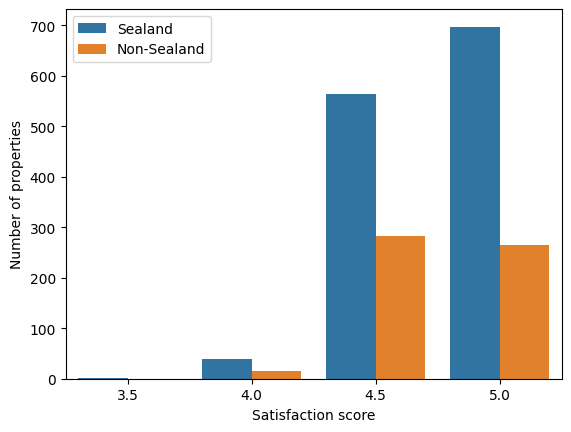

In [20]:
# filtering data based on the number of reviews
df_rev = df[df['reviews']>30]

ax = sns.countplot(data=df_rev, x='overall_satisfaction',hue='location')
ax.set_ylabel('Number of properties')
ax.set_xlabel('Satisfaction score')
plt.legend(loc="upper left")
plt.show()

Based on the number of properties in each rating category, it can be observed that:

+ The data lacks information about properties with low overall_satisfaction (below 3 points).
+ Properties with sufficient data mostly achieve very high overall_satisfaction ratings.
+ The number of properties with high satisfaction levels in Sealand is significantly higher than the rest of Denmark.

##### **b. Hypothesis Testing: Are Satisfaction Scores Higher for Properties in Sealand Compared to the Rest of Denmark?**

Data distribution: does the data follow normal distribution

Number of Sealand properties: 1302
Number of Non-Sealand properties: 562


<Figure size 200x200 with 0 Axes>

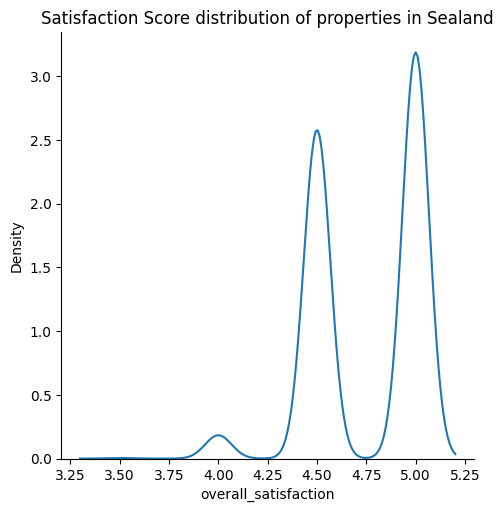

<Figure size 200x200 with 0 Axes>

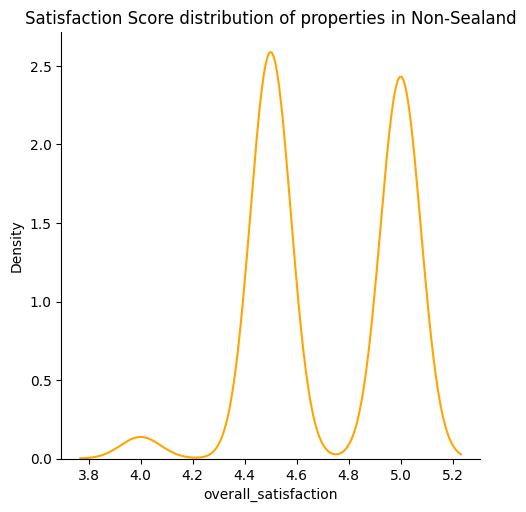

In [21]:
# seperating dataset
df_sea = df_rev[df_rev['location'] == 'Sealand']
df_non = df_rev[df_rev['location'] == 'Non-Sealand']

# number of properties
print('Number of Sealand properties:', len(df_sea))
print('Number of Non-Sealand properties:', len(df_non))

# plot Sealand
plt.figure(figsize=(2,2))
sns.displot(data=df_sea, x='overall_satisfaction', kind='kde')
plt.title('Satisfaction Score distribution of properties in Sealand')
plt.show()

# plot Non-Sealand
plt.figure(figsize=(2,2))
sns.displot(data=df_non, x='overall_satisfaction', kind='kde', color='orange')
plt.title('Satisfaction Score distribution of properties in Non-Sealand')
plt.show()

Hypothesis testing with Mann Whitney U method

In [22]:
import numpy as np
from scipy.stats import mannwhitneyu

print('Hypothesis statement:')
print('H0: average satisfaction of Sealand <= average satisfaction of Non-Sealand')
print('H1: average satisfaction of Sealand > average satisfaction of Non-Sealand')
print()

data_sealand = df_sea['overall_satisfaction']
data_non_sealand = df_non['overall_satisfaction']

# Mann-Whitney U test
statistic, p_value = mannwhitneyu(data_sealand, data_non_sealand, alternative='greater')

# result
print("Statistic:", statistic)
print("p-value:", p_value)

# conclude
alpha = 0.05
print("alpha:", alpha)
print()
print("Conclusion:")
if p_value < alpha:
    print("There is sufficient evidence, at 95% confidence level, to conclude the average satisfaction of properties in Sealand is higher than the rest of Denmark")
else:
    print("There is insufficient evidence, at 95% confidence level, to conclude the average satisfaction of properties in Sealand is higher than the rest of Denmark")


Hypothesis statement:
H0: average satisfaction of Sealand <= average satisfaction of Non-Sealand
H1: average satisfaction of Sealand > average satisfaction of Non-Sealand

Statistic: 387645.5
p-value: 0.009921416231619034
alpha: 0.05

Conclusion:
There is sufficient evidence, at 95% confidence level, to conclude the average satisfaction of properties in Sealand is higher than the rest of Denmark


In conclusion, the properties in Denmark have received positive feedback from customers, as reflected in the majority of reviews being rated above 3 stars. There is sufficient evidence, at 95% confidence level, to conclude the average satisfaction of properties in Sealand is higher than the rest of Denmark

### **4. Prominent hosts in Sealand**

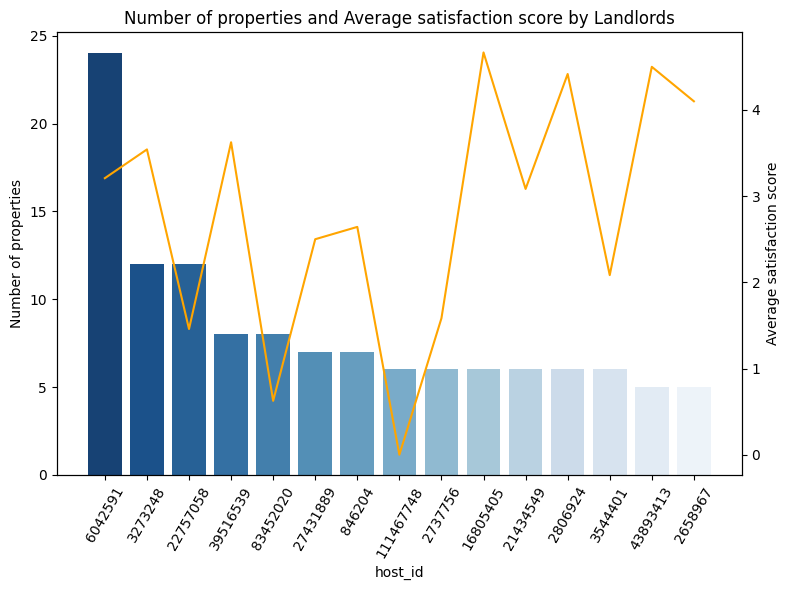

In [23]:
number_of_host = 15

df_sea = df[df['location'] == 'Sealand']
gr_sea = df_sea.groupby('host_id').agg({'prop_room_id':'count','overall_satisfaction':'mean'}).reset_index().sort_values(by='prop_room_id', ascending=False).head(number_of_host)
gr_sea['host_id'] = gr_sea['host_id'].astype(str)

# prepare for visualizing
fig, ax1 = plt.subplots(figsize=(8,6))
plt.xticks(rotation=60)

# plot number of properties
sns.barplot(data = gr_sea, x='host_id', y='prop_room_id', palette='Blues_r', ax=ax1)
ax1.set_ylabel('Number of properties')

# plot satisfaction score
ax2 = plt.twinx()
sns.lineplot(data=gr_sea, x='host_id', y='overall_satisfaction', ax=ax2, color='orange')
ax2.set_ylabel('Average satisfaction score')

plt.title('Number of properties and Average satisfaction score by Landlords')
plt.tight_layout()
plt.show()

From the plot, it is evident that host number 6042591 has the highest number of properties, totaling approximately 25 houses. However, hosts with more than 6 properties appear to have a lower average satisfaction score.

# **Phase 3. Prediction Model: Properties price classification**

*AirBnB is planning an advertising campaign to promote “budget” accommodation on Sealand, i.e.properties where the price per night stay is less than $US90. Develop different classification models using appropriate input (i.e., predictor) attributes that can be used to best classify whether a Sealand rental property is budget or not*

Labeling

In [24]:
df['budget'] = 0
df.loc[df['price_per_night']<90, 'budget'] = 1

In [25]:
df = df.drop(columns={'prop_room_id', 
                        'host_id',
                        'description',
                        'first_listed',
                        'location',
                        'price_USD',
                        'minstay',
                        'price_per_night'})
df.head(2)

,prop_room_type,neighborhood,reviews,overall_satisfaction,accommodates,latitude,longitude,budget
0,Private room,Tårnby,354,5.0,1.0,55.616651,12.631454,1
1,Private room,København,285,4.5,2.0,55.670082,12.556838,1


Transforming Categorical attributes: prop_room_type, neighborhood

In [26]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
cols = ['prop_room_type','neighborhood']

for col in cols:
    df[col] = enc.fit_transform(df[col])

Data Distribution

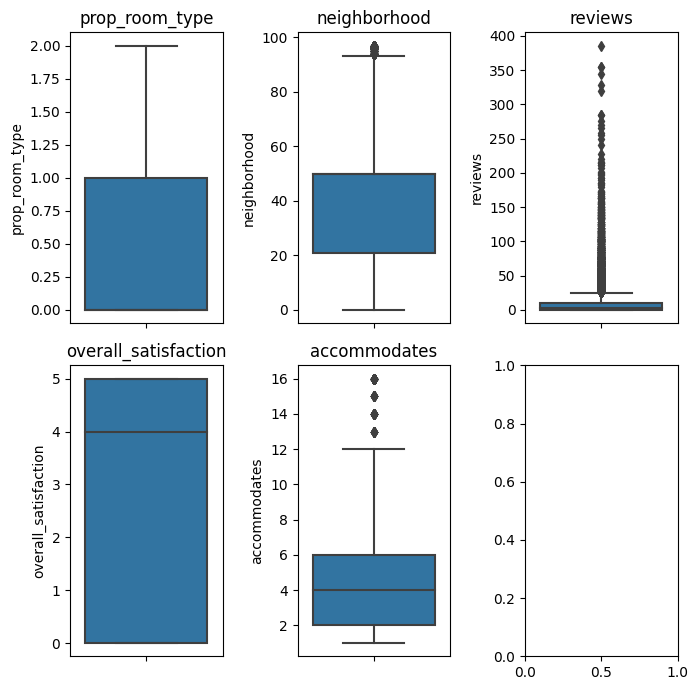

In [27]:
columns = ['prop_room_type','neighborhood','reviews','overall_satisfaction', 'accommodates']
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
axs = axs.ravel()
for ind, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axs[ind])
    axs[ind].set_title(col)

plt.tight_layout()
plt.show()

Handling Outliers

Number of observations before outliers removal: 23936
Number of observations after outliers removal: 20757


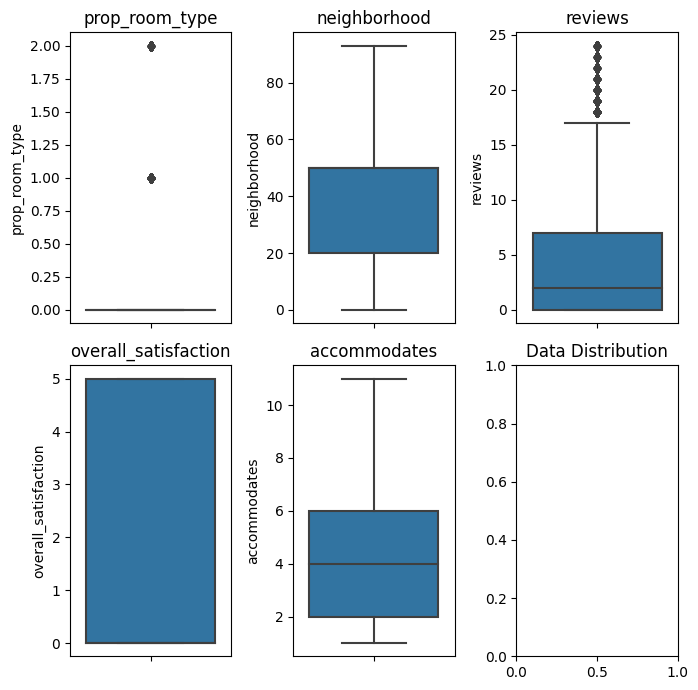

In [28]:
print('Number of observations before outliers removal:', len(df))
# Remove outliers for the 3 columns
columns = ['neighborhood', 'reviews', 'accommodates']
def iqr_outliers(series):
    Q1, Q3= np.percentile(series,[25,75])
    IQR = Q3 - Q1 
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    series_outlier_removed = series[(series > lower_fence) & (series < upper_fence)]
    return series_outlier_removed
for col in columns:
    df[col] = iqr_outliers(df[col])
df = df.dropna()
print('Number of observations after outliers removal:', len(df))
# Visualize the distribution
columns = ['prop_room_type','neighborhood','reviews','overall_satisfaction', 'accommodates']
fig, axs = plt.subplots(2, 3, figsize=(7, 7))
axs = axs.ravel()
for ind, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axs[ind])
    axs[ind].set_title(col)
plt.title('Data Distribution')
plt.tight_layout()
plt.show()


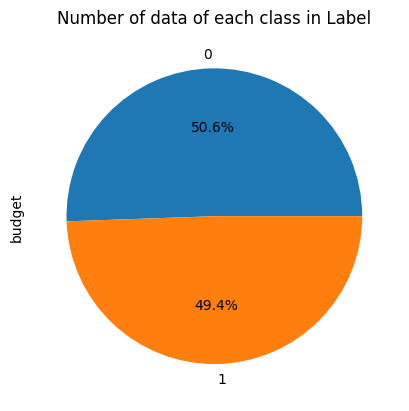

In [29]:
df['budget'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Number of data of each class in Label')
plt.show()

Correlation

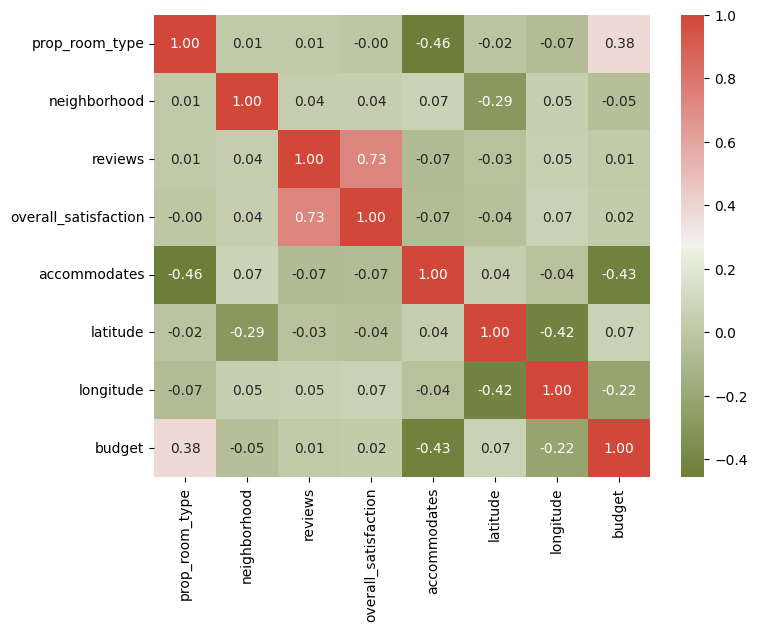

In [30]:
# pearson correlation
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 15, as_cmap=True)

# plotting
plt.figure(figsize=(8,6))
sns.heatmap(data=corr,annot=True, cmap=cmap,fmt=".2f")
plt.show()


Multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'grade') should not be included in variables
# categorical variables may or maynot be added if any
variables = df
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,19940.276986,const
1,1.338719,prop_room_type
2,1.109271,neighborhood
3,2.140307,reviews
4,2.145881,overall_satisfaction
5,1.451201,accommodates
6,1.332516,latitude
7,1.309054,longitude
8,1.378779,budget


Modelling

In [32]:
#  preprocess
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
x = df.drop(columns={'budget'}, axis =1 )
y = df['budget']

In [34]:
#Splitting our data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state  = 365, stratify=df['budget'])

In [35]:
y_train.value_counts()

0    8395
1    8210
Name: budget, dtype: int64

In [36]:
y_test.value_counts()

0    2099
1    2053
Name: budget, dtype: int64

Logistic Regression

Accuracy = 0.7302504816955684
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2099
           1       0.72      0.74      0.73      2053

    accuracy                           0.73      4152
   macro avg       0.73      0.73      0.73      4152
weighted avg       0.73      0.73      0.73      4152



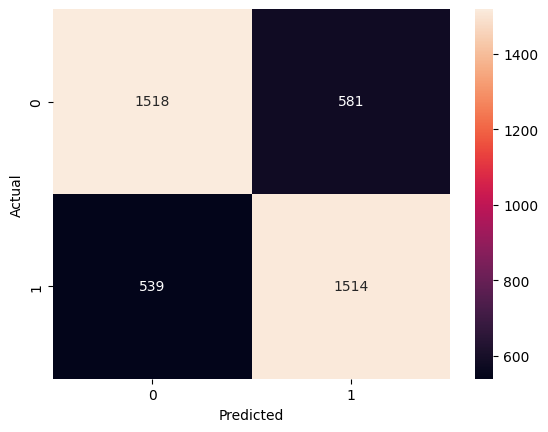

In [37]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression() 
reg.fit(x_train,y_train)

y_hat = reg.predict(x_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_hat)))

# cassification report
print(classification_report(y_test,y_hat))

# confustion matrix
cm = confusion_matrix(y_test, y_hat)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

KNN

Accuracy = 0.7223025048169557
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      2099
           1       0.73      0.70      0.71      2053

    accuracy                           0.72      4152
   macro avg       0.72      0.72      0.72      4152
weighted avg       0.72      0.72      0.72      4152



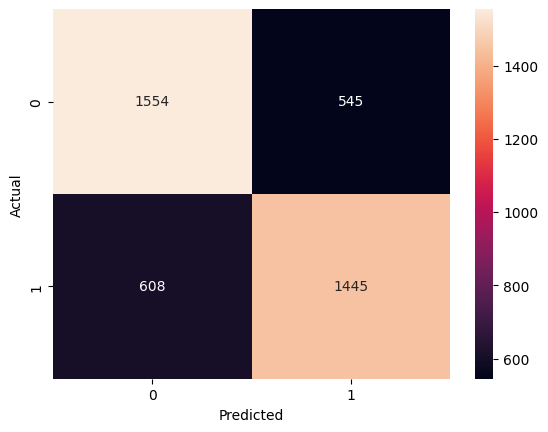

In [38]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
reg = KNeighborsClassifier(n_neighbors=k)
reg.fit(x_train,y_train)

y_hat = reg.predict(x_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_hat)))

# cassification report
print(classification_report(y_test,y_hat))

# confustion matrix
cm = confusion_matrix(y_test, y_hat)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

Decision Tree

Accuracy = 0.7223025048169557
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      2099
           1       0.73      0.70      0.71      2053

    accuracy                           0.72      4152
   macro avg       0.72      0.72      0.72      4152
weighted avg       0.72      0.72      0.72      4152



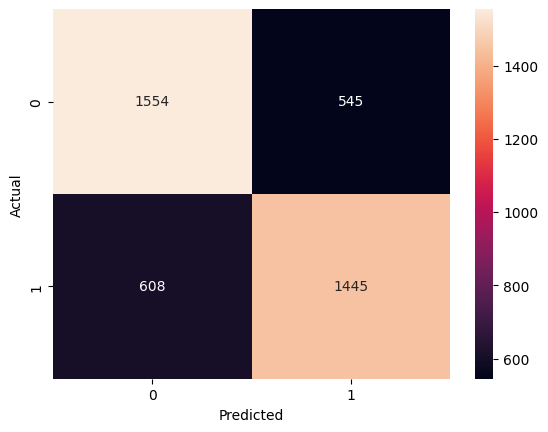

In [39]:
from sklearn.tree import DecisionTreeClassifier 
dd = DecisionTreeClassifier()
dd.fit(x_train,y_train)
y_pred = dd.predict(x_test)

# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_hat)))

# cassification report
print(classification_report(y_test,y_hat))

# confustion matrix
cm = confusion_matrix(y_test, y_hat)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()